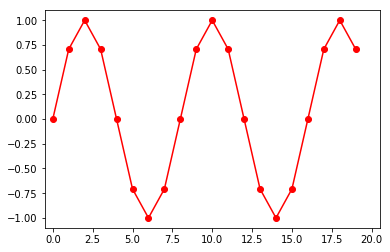

In [26]:
import numpy as np
import matplotlib.pyplot as plt

s = np.sin(2 * np.pi * 0.125 * np.arange(20)) #20개의 값
plt.plot(s, 'ro-') #red o 를 이어서
plt.xlim(-0.5, 20.5) # 그림 범위설정
plt.ylim(-1.1, 1.1) # 그림 범위설정
plt.show()

In [27]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1])) 
S[:5, :3] 
# fliplr : 행렬을 좌우로 뒤집기
# np_r : row로 병합하는 것 https://stackoverflow.com/questions/30597869/what-does-np-r-do-numpy
# s[-1] : s의 마지막 아이템  https://stackoverflow.com/questions/509211/understanding-pythons-slice-notation 참고
# np.zeros() : 괄호의 숫자만큼 0
# s.shape : s의 (행, 열) => s.shape[0] 은 s의 행 -> s.shape[0] -2 = 여기서는 20-2 =18
# s[::-1] : s 전체를 reverse하게 배열
# 퇴플리츠 행렬 : 대각선 위의 성분들이 같은 정사각 행렬

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [28]:
X_train = S[:-1, :3][:, :, np.newaxis] #np.newaxis : 길이가 1인 새로운 축을 추가
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [29]:
X_train[:4]

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16]],

       [[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]]])

In [30]:
Y_train[:4]

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00])

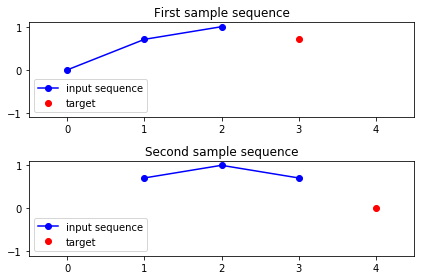

In [31]:
plt.subplot(211) # nrows=2, ncols=1, plot_number=1. 행 2개 열 1개로 그림을 그리는데, 그 중 첫번째 그림
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend() # 도표
plt.title("First sample sequence")
plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.tight_layout() # 플롯간의 간격을 자동으로 맞춰 줌
plt.show()

In [32]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense #Dense 설명 https://tykimos.github.io/2017/01/27/MLP_Layer_Talk/

np.random.seed(0) # () 의 수보다 큰 숫자가 생성됨. 
model = Sequential() #순차모델
model.add(SimpleRNN(10, input_shape=(3, 1)))
model.add(Dense(1, activation="linear")) # line 6, 7 참고 https://stackoverflow.com/questions/50134334/number-of-parameters-for-keras-simplernn
model.compile(loss='mse', optimizer='sgd')

Using TensorFlow backend.


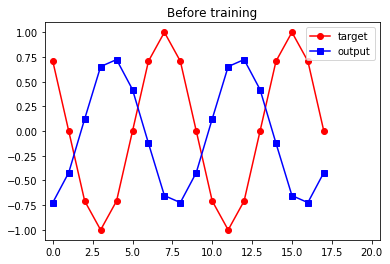

In [33]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [34]:
history = model.fit(X_train, Y_train, epochs=100, verbose=0)

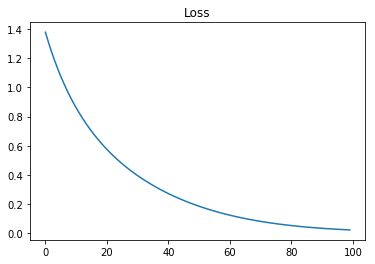

In [35]:
plt.plot(history.history["loss"]) # epoch에 따른 loss (오차율) 확인
plt.title("Loss")
plt.show()

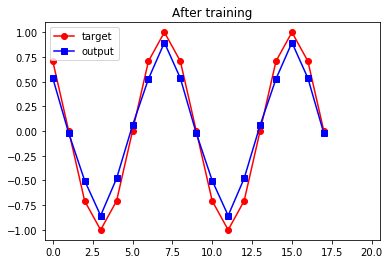

In [36]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()